In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
df = pd.read_csv('market.csv')
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


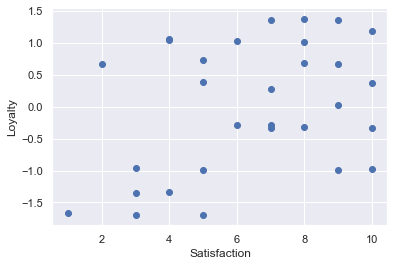

In [51]:
plt.scatter(df['Satisfaction'],df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [52]:
# K-Means Clusting

from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(2)

In [54]:
x = df.copy()


In [55]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
identified_clusters = kmeans.fit_predict(x)

In [57]:
identified_clusters

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

In [58]:
x['Cluster_predicted'] = identified_clusters

In [59]:
x

,Satisfaction,Loyalty,Cluster_predicted
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


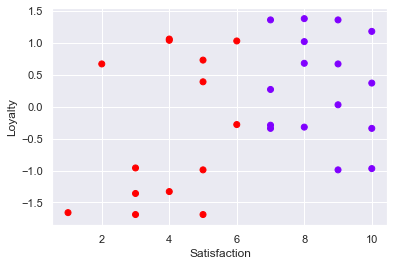

In [60]:
plt.scatter(x['Satisfaction'],x['Loyalty'],c=x['Cluster_predicted'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

**This shows that the values have to standardized**

In [61]:
from sklearn import preprocessing

In [62]:
x = df.copy()

In [63]:
x_scaled = preprocessing.scale(x)

In [64]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [65]:
# We determine the optimal k-value using the elbow method

wcss = []
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 5.34807941029098,
 4.337110750237059]

In [66]:
clusters = range(1,9)

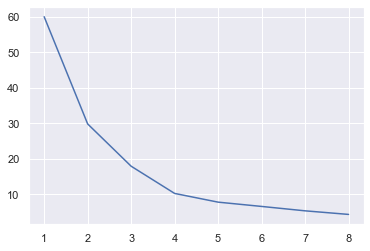

In [67]:
plt.plot(clusters,wcss)

In [68]:
# K Means clustering for k = 2

kmeans = KMeans(2)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
x['cluster_pred'] = kmeans.fit_predict(x_scaled)

In [70]:
x.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0


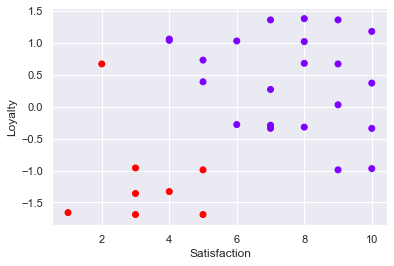

In [71]:
plt.scatter(x['Satisfaction'],x['Loyalty'],c=x['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

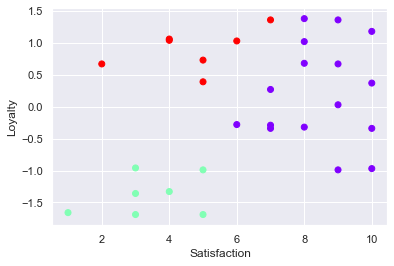

In [72]:
# K Means clustering for k = 3

kmeans = KMeans(3)
kmeans.fit(x_scaled)
x['cluster_pred'] = kmeans.fit_predict(x_scaled)

plt.scatter(x['Satisfaction'],x['Loyalty'],c=x['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

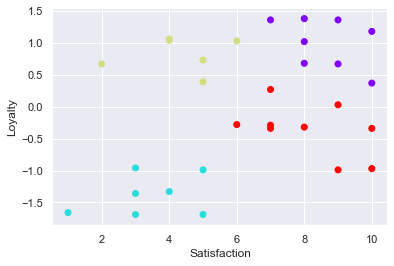

In [73]:
# K Means clustering for k = 4


kmeans = KMeans(4)
kmeans.fit(x_scaled)
x['cluster_pred'] = kmeans.fit_predict(x_scaled)

plt.scatter(x['Satisfaction'],x['Loyalty'],c=x['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

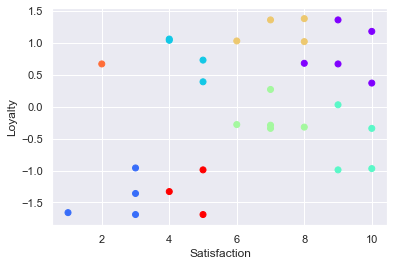

In [74]:
# K Means clustering for k = 5

kmeans = KMeans(8)
kmeans.fit(x_scaled)
x['cluster_pred'] = kmeans.fit_predict(x_scaled)

plt.scatter(x['Satisfaction'],x['Loyalty'],c=x['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()